In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

topics = ['abstract_algebra', 'anatomy', 'astronomy', 'business_ethics', 'clinical_knowledge', 'college_biology', 'college_chemistry', 'college_computer_science', 'college_mathematics', 'college_medicine', 'college_physics', 'computer_security', 'conceptual_physics', 'econometrics', 'electrical_engineering', 'elementary_mathematics', 'formal_logic', 'global_facts', 'high_school_biology', 'high_school_chemistry', 'high_school_computer_science', 'high_school_european_history', 'high_school_geography', 'high_school_government_and_politics', 'high_school_macroeconomics', 'high_school_mathematics', 'high_school_microeconomics', 'high_school_physics', 'high_school_psychology', 'high_school_statistics', 'high_school_us_history', 'high_school_world_history', 'human_aging', 'human_sexuality', 'international_law', 'jurisprudence', 'logical_fallacies', 'machine_learning', 'management', 'marketing', 'medical_genetics', 'miscellaneous', 'moral_disputes', 'moral_scenarios', 'nutrition', 'philosophy', 'prehistory', 'professional_accounting', 'professional_law', 'professional_medicine', 'professional_psychology', 'public_relations', 'security_studies', 'sociology', 'us_foreign_policy', 'virology', 'world_religions']


In [5]:
model_path = "ckpts/sft_mmlu_llama7B/checkpoint_10000/hf_model/"


for topic in topics:
    print(topic)
    print(np.load(model_path +f"{topic}_correct_all.npy").mean())

abstract_algebra
0.2727272727272727
anatomy
0.5714285714285714
astronomy
0.4375
business_ethics
0.36363636363636365
clinical_knowledge
0.6206896551724138
college_biology
0.3125
college_chemistry
0.125
college_computer_science
0.36363636363636365
college_mathematics
0.18181818181818182
college_medicine
0.5
college_physics
0.45454545454545453
computer_security
0.18181818181818182
conceptual_physics
0.4230769230769231
econometrics
0.3333333333333333
electrical_engineering
0.3125
elementary_mathematics
0.2682926829268293
formal_logic
0.2857142857142857
global_facts
0.5
high_school_biology
0.5
high_school_chemistry
0.3181818181818182
high_school_computer_science
0.6666666666666666
high_school_european_history
0.8333333333333334
high_school_geography
0.7727272727272727
high_school_government_and_politics
0.6666666666666666
high_school_macroeconomics
0.46511627906976744
high_school_mathematics
0.2413793103448276
high_school_microeconomics
0.6153846153846154
high_school_physics
0.2352941176470

In [13]:
model_path = "ckpts/sft_mmlu_llama7B/checkpoint_05000/hf_model/"


for topic in topics:
    print(topic)
    print(np.load(model_path +f"{topic}_trainpts_correct_all.npy").mean())

abstract_algebra
0.29
anatomy
0.5259259259259259
astronomy
0.5394736842105263
business_ethics
0.62
clinical_knowledge
0.6226415094339622
college_biology
0.5486111111111112
college_chemistry
0.41
college_computer_science
0.44
college_mathematics
0.4
college_medicine
0.5433526011560693
college_physics
0.4215686274509804
computer_security
0.64
conceptual_physics
0.5106382978723404
econometrics
0.37719298245614036
electrical_engineering
0.496551724137931
elementary_mathematics
0.3492063492063492
formal_logic
0.3492063492063492
global_facts
0.39
high_school_biology
0.6193548387096774
high_school_chemistry
0.43842364532019706
high_school_computer_science
0.5
high_school_european_history
0.7272727272727273
high_school_geography
0.6868686868686869
high_school_government_and_politics
0.7927461139896373
high_school_macroeconomics
0.5897435897435898
high_school_mathematics
0.3296296296296296
high_school_microeconomics
0.6050420168067226
high_school_physics
0.39072847682119205
high_school_psycholo

In [19]:
# ckpts = ["00500", "01000", "02000", "03000", "05000", "10000"]
ckpts = ["00500", "01000", "02000", "03000", "05000", "07000", "10000"]

accuracies_all = []
for ckpt in ckpts: 
    model_path = f"ckpts/sft_mmlu_llama7B/checkpoint_{ckpt}/hf_model/"
    accuracies = []
    for topic in topics:
        accuracies.append(np.load(model_path +f"{topic}_trainpts_correct_all.npy").mean())
    accuracies_all.append(accuracies)
accuracies_all = np.array(accuracies_all)

abstract_algebra
anatomy
astronomy
business_ethics
clinical_knowledge
college_biology
college_chemistry
college_computer_science
college_mathematics
college_medicine
college_physics
computer_security
conceptual_physics
econometrics
electrical_engineering
elementary_mathematics
formal_logic
global_facts
high_school_biology
high_school_chemistry
high_school_computer_science
high_school_european_history
high_school_geography
high_school_government_and_politics
high_school_macroeconomics
high_school_mathematics
high_school_microeconomics
high_school_physics
high_school_psychology
high_school_statistics
high_school_us_history
high_school_world_history
human_aging
human_sexuality
international_law
jurisprudence
logical_fallacies
machine_learning
management
marketing
medical_genetics
miscellaneous
moral_disputes
moral_scenarios
nutrition
philosophy
prehistory
professional_accounting
professional_law
professional_medicine
professional_psychology
public_relations
security_studies
sociology
us_f

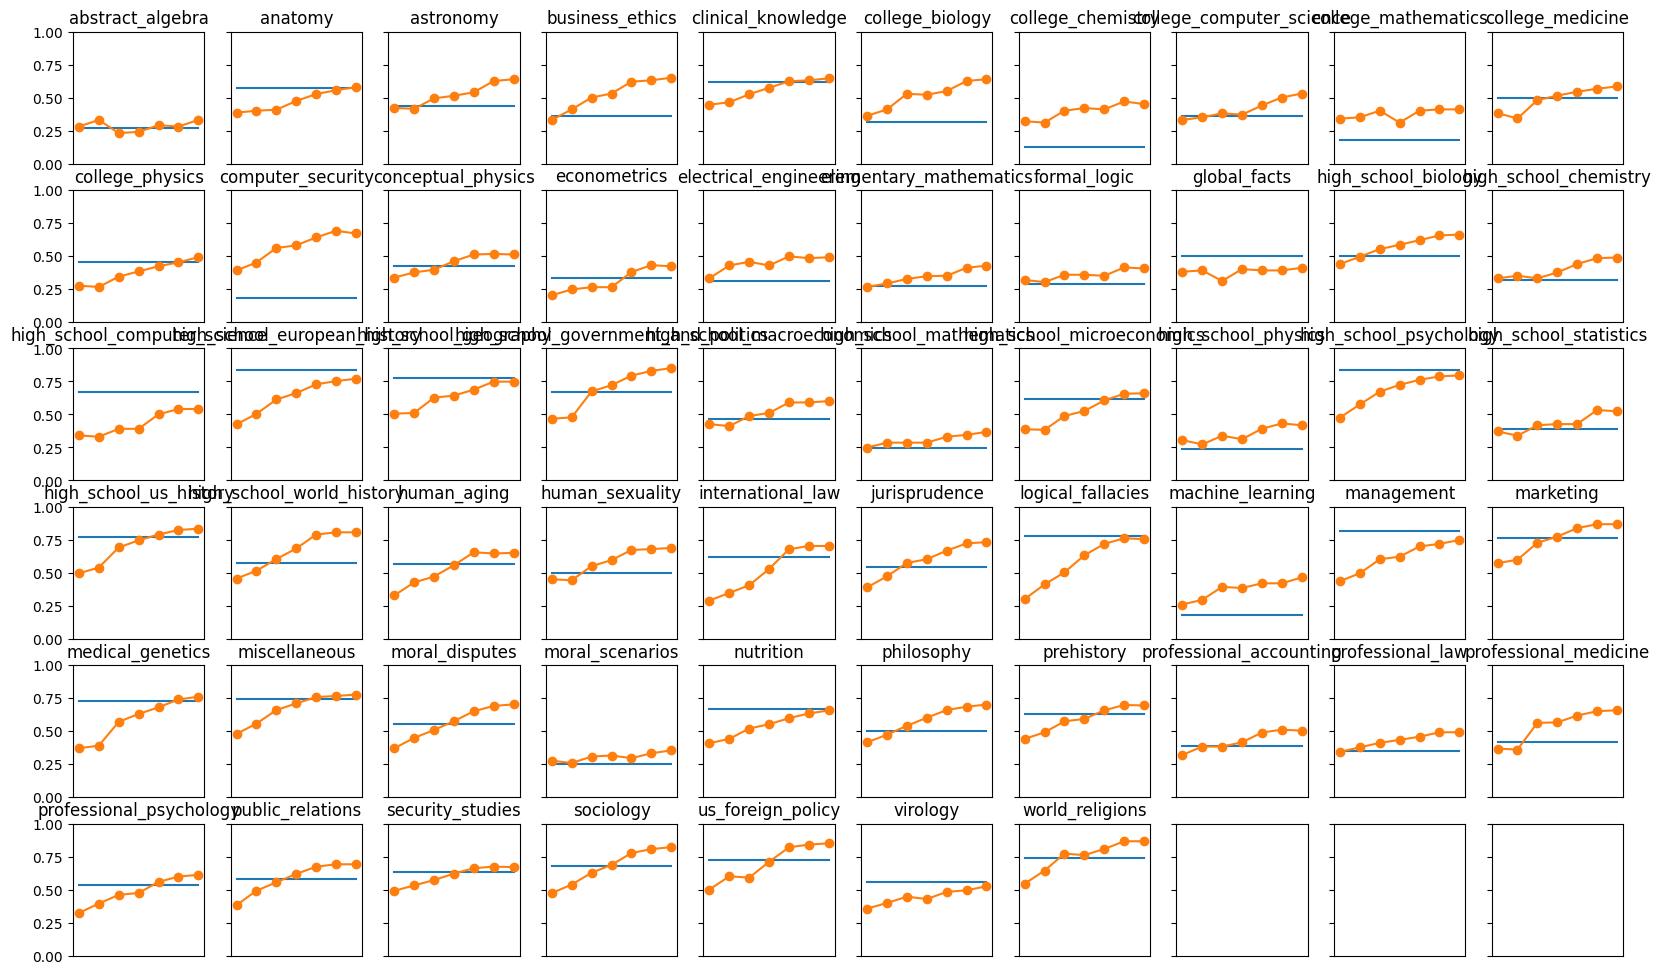

In [24]:
# make 6 by 10 subplots

fig, axs = plt.subplots(6, 10, figsize=(20, 12), sharex=True, sharey=True)

for i, topic in enumerate(topics):
    print(topic)
    ax = axs[i//10, i%10]
    eval_mean = np.load(f"ckpts/sft_mmlu_llama7B/checkpoint_10000/hf_model/{topic}_correct_all.npy").mean()
    ax.plot([0, 6], [eval_mean, eval_mean])
    ax.plot(accuracies_all[:, i], "o-")
    ax.set_title(topic)
    ax.set_ylim(0, 1)
    #  get rid of labels
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_xticks([])